# EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import sys
import os

### 0.1. Carga de los datos

In [60]:
movie_df = pd.read_parquet('../datasets/movie_dataset_final.parquet', engine='pyarrow')
generos_df = pd.read_parquet('../datasets/generos_df.parquet', engine='pyarrow')


In [11]:
movie_df.head(1)

,id_movie,budget,original_language,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,id_genres,return,release_year
0,862,30000000,en,"Led by Woody, Andy's toys live happily in his ...",21.95,1995-10-30,373554033,81,Toy Story,7.7,5415,16,12.45,1995


In [12]:
# Posibles variables a analizar
movie_df.columns

Index(['id_movie', 'budget', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'title', 'vote_average',
       'vote_count', 'id_genres', 'return', 'release_year'],
      dtype='object')

In [13]:
movie_df.dtypes

id_movie                      Int64
budget                        Int64
original_language            object
overview                     object
popularity                  float64
release_date         datetime64[ns]
revenue                       Int64
runtime                       Int64
title                        object
vote_average                float64
vote_count                    Int64
id_genres                     int64
return                      float64
release_year                  Int64
dtype: object

In [14]:
# No hay valores nulos, ya se eliminaron/rellenaron en el ETL
movie_df.isnull().sum()

id_movie             0
budget               0
original_language    0
overview             0
popularity           0
release_date         0
revenue              0
runtime              0
title                0
vote_average         0
vote_count           0
id_genres            0
return               0
release_year         0
dtype: int64

Los campos que considero interesantes para un análisis: 
- Mayores Fecha de estreno: release_date
- Relacion entre budget(presupuesto) y revenue(recaudación)
- Relación entre vote_count y recaudación
- Relación entre popularity y recaudación
- Relación entre budget y return(retorno de inversión)
- Lenguaje de las peliculas 


In [31]:
# Funcion para conversion a millones 
def to_millions(x, pos):
    return f'{x*1e-6:.1f}M'  # Se multiplica por 1e-6 para convertir de unidades a millones


## 1 
- **Análisis**: Distribución entre la Fecha de estreno y la relación con Popularidad y Recaudación *(release_date, popularity,revenue )* <p>
- **Objetivo**: Verificar si la fecha de estreno influye en la popularidad y la recaudación de la película.

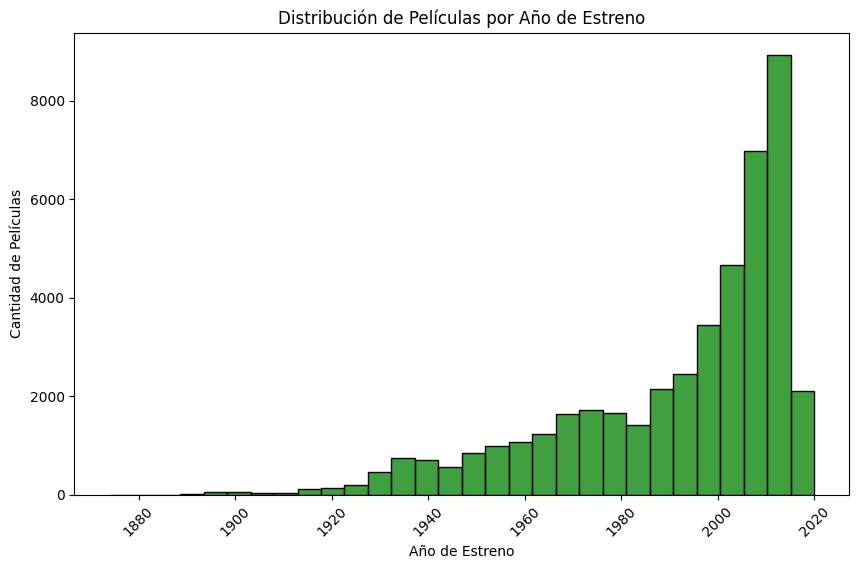

In [ ]:
# Grafica de fecha_estrebno X cant_peliculas (distribucion)
plt.figure(figsize=(10, 6))
sns.histplot(movie_df['release_year'], kde=False, bins=30, color='green')
plt.title('Distribución de Películas por Año de Estreno')
plt.xlabel('Año de Estreno')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=45)
plt.show()

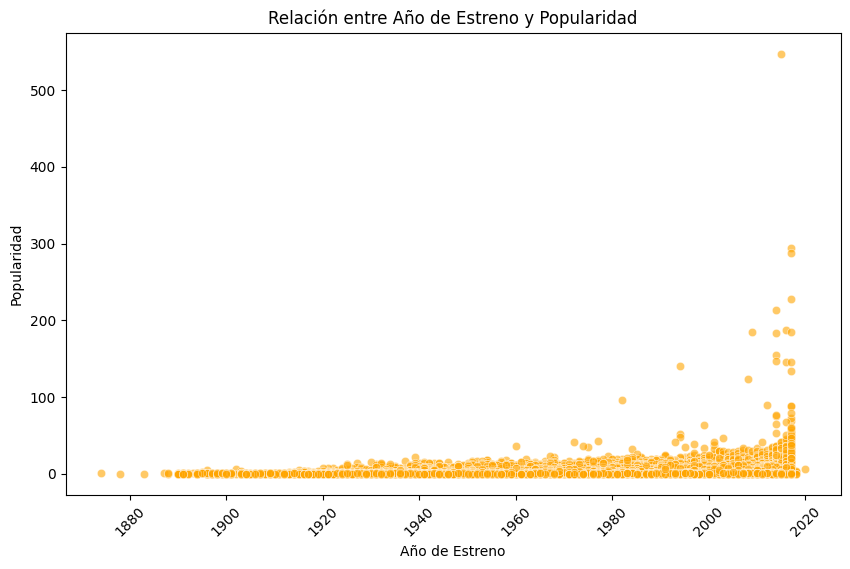

In [17]:
# Relación entre 'release_year', 'popularity' y 'revenue'
# Usamos un gráfico de dispersión para observar si hay tendencias entre estas variables

# Relación entre 'release_year' y 'popularity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='popularity', data=movie_df, alpha=0.6, color='orange')
plt.title('Relación entre Año de Estreno y Popularidad')
plt.xlabel('Año de Estreno')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.show()

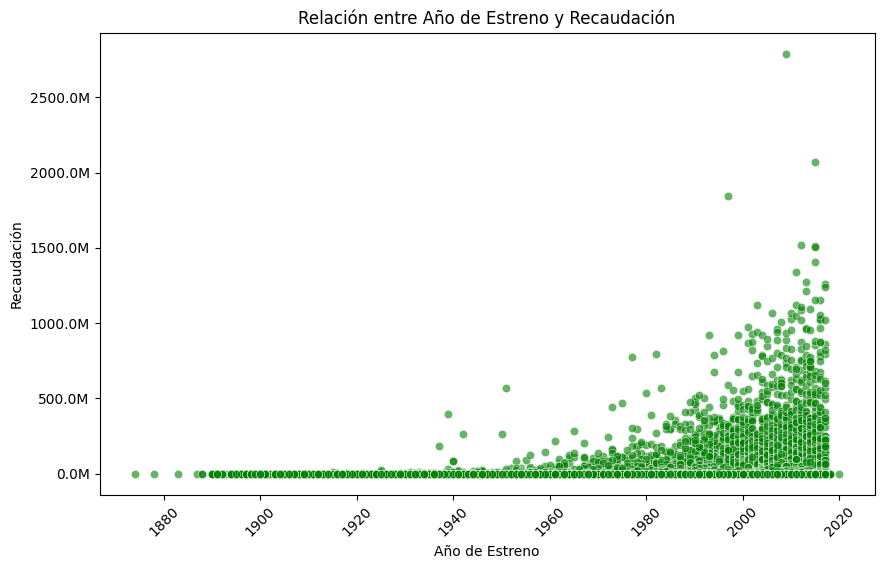

In [32]:
# Relación entre 'release_year' y 'revenue'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='revenue', data=movie_df, alpha=0.6, color='green')
plt.title('Relación entre Año de Estreno y Recaudación')
plt.xlabel('Año de Estreno')
plt.ylabel('Recaudación')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_millions))
plt.show()

**Resultado analísis**: Se observa que las distribuciones presentan un tendencia a aumentar la cantidad de peliculas, la popularidad y la recaudación según aumenta la fecha de estreno. 
Se resalta que a partir de la década de los 90 el incremento es más notable, teniendo un pico de mayores peliculas estrenadas entre el 2010-2015. Para posterior disminuir drásticamento en los posteriores 5 años.
La popularidad se mantiene relativamente estable, pero igualmente hay incrementos. 
Respecto a la recaudación por año de estreno, se puede observar una clara tendencia positiva con mayor incidencia entre los 1000 - 1500 millones. 
Se puede afirmar que la primera gráfica presenta una tendencia de distribución sesgada a la izquierda.

Las 3 variables a analizar (cantidad, popularidad, recaudacion) presentan las caracteristicas señaladas probablemente a diversos factores como el auge de plataforma de streaming, avance de tecnologías en la industria cinematográfica, o una mayor globalización en relación a cine.


## 2 
- **Análisis**: Relación entre budget (Presupuesto) y revenue (Recaudación)
- **Objetivo**: Identificar si las películas con mayor presupuesto suelen generar mayores ingresos.


In [43]:
# Analisis de correlacion
# Calcular la correlación entre 'vote_count' y 'revenue'
correlacion = round(movie_df['budget'].corr(movie_df['revenue']),2)
print("Coeficiente de correlación de Pearson entre 'budget' y 'revenue':", correlacion)

Coeficiente de correlación de Pearson entre 'budget' y 'revenue': 0.77


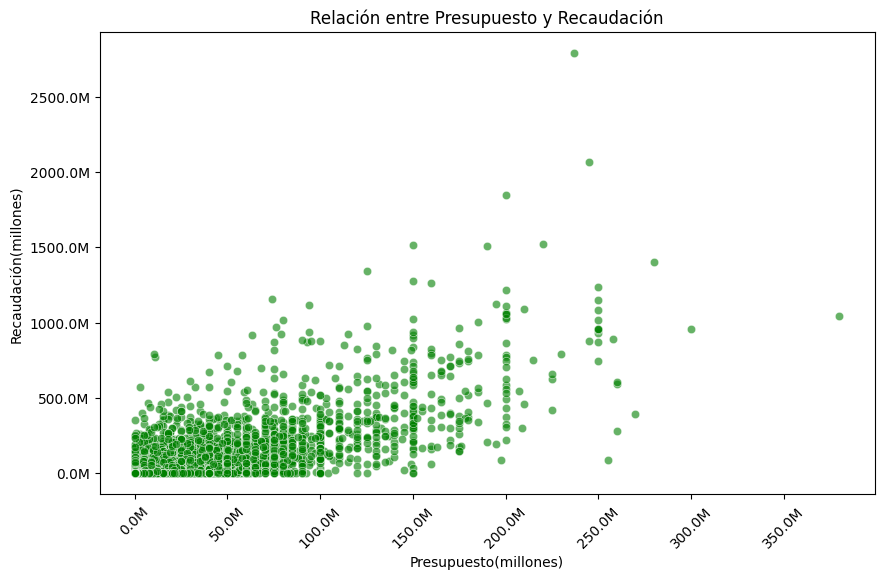

In [ ]:
# Relación entre 'budget' y 'revenue'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=movie_df, alpha=0.6, color='green')
plt.title('Relación entre Presupuesto y Recaudación')
plt.xlabel('Presupuesto(millones)')
plt.ylabel('Recaudación(millones)')

# Aplicamos el formato de millones a los ejes X y Y
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_millions))
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_millions))

plt.xticks(rotation=45)
plt.show()

In [ ]:
# Outliers


## 3 
- **Análisis**: Relación entre vote_count (Cantidad de Votos) y revenue (Recaudación).
- **Objetivo**: 

In [41]:
# Analisis de correlacion
# Calcular la correlación entre 'vote_count' y 'revenue'
correlacion = round(movie_df['vote_count'].corr(movie_df['revenue']),2)
print("Coeficiente de correlación de Pearson entre 'vote_count' y 'revenue':", correlacion)


Coeficiente de correlación de Pearson entre 'vote_count' y 'revenue': 0.81


Como el valor es cercano a 1, entonces hay una fuerte correlación positiva entre vote_count y revenue. Se procede a visualizar mediante un mapa de calor entre estas 2 variables

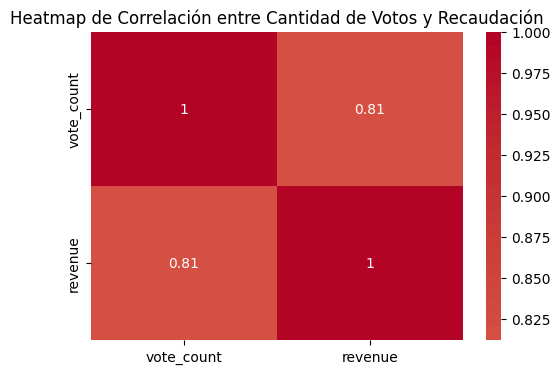

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = movie_df[['vote_count', 'revenue']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlación entre Cantidad de Votos y Recaudación')
plt.show()

**Resultado analísis**: Como el indice correlación de Pearson y el mapa de calor indica, este es de 0.81. Aunque no es una correlación positiva perfecta, sí presenta una correlación positiva fuerte.
Lo que significa que las películas con mayores votos, son las tienden a obtener mayor recaudación.
Tambien del analisis podemos obtener una variable de popularidad, las que son más populares o conocidas, tienden a ser más votadas y se esperaría que obtengan mayor cantidad de recaudación.
Sin embargo, hay que tener en cuenta que el tener una fuerte correlación no implica una causalidad, osea que la pelicula cuente con mayor votos no necesariamente genera que tenga mayor ingreso. Hay otros factores pueden si ser causales o afectar a la recaudación en conjunto.

## 4 
- **Análisis**: Relación entre budget(presupuesto/inversion) y return (Retorno de Inversión)
- **Objetivo**: Determinar si gastar más en una película se traduce en un retorno más alto.

In [52]:
# Calcular la correlación entre budget y return
correlation = movie_df['budget'].corr(movie_df['return'])
print("Coeficiente de correlación de Pearson entre 'vote_count' y 'revenue':", correlacion)

Coeficiente de correlación de Pearson entre 'vote_count' y 'revenue': 0.77


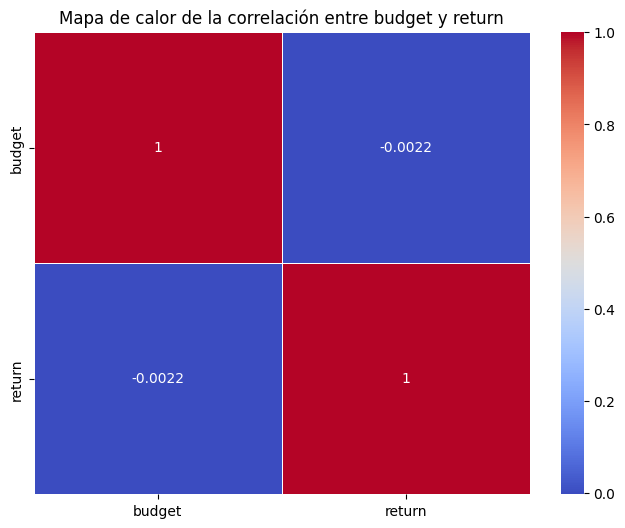

In [53]:
# Crear la matriz de correlación
correlation_matrix = movie_df[['budget', 'return']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de la correlación entre budget y return')
plt.show()

**Resultado analísis**: 

## 5  
- **Análisis**: Análisis de Géneros (id_genres)
- **Objetivo**: Identificar qué géneros son los más rentables o populares.

In [64]:
 # Unir datasets usando la columna `id_movie`
merged_df = movie_df.merge(generos_df, on='id_genres', how='inner')


In [62]:
generos_df

,id_genres,name_genres
0,16,Animation
1,35,Comedy
2,10751,Family
3,12,Adventure
4,14,Fantasy
5,10749,Romance
6,18,Drama
7,28,Action
8,80,Crime
9,53,Thriller


In [ ]:
# Agrupar por género 
# Se calcula el promedio por género de revenue(recaudacion) y popularidad

genre_avg = merged_df.groupby('name_genres').agg(
    revenue_avg_=('revenue', 'mean'),
    popularity_avg=('popularity', 'mean')
).reset_index()

# Promedio pr géneros
print(genre_avg)


                         name_genres     revenue_avg_  popularity_avg
0                             Action  10573551.870134        3.066901
1                          Adventure  12449303.832137        3.123037
2                          Animation  12445785.354785        2.832525
3               Carousel Productions              0.0        0.390000
4                             Comedy  14147942.269372        3.136243
5                              Crime  11286247.540682        2.972962
6                        Documentary   9930565.428459        2.402052
7                              Drama  10754447.308253        2.978742
8                             Family     16562488.968        3.570568
9                            Fantasy  13380114.679144        3.047193
10                           Foreign   6636506.847826        2.182391
11                           History        8142434.0        2.765349
12                            Horror  10495447.596307        3.002745
13                  

C:\Users\Angelica\AppData\Local\Temp\ipykernel_26764\750406775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue_avg_', y='name_genres', data=genre_avg, palette='viridis')


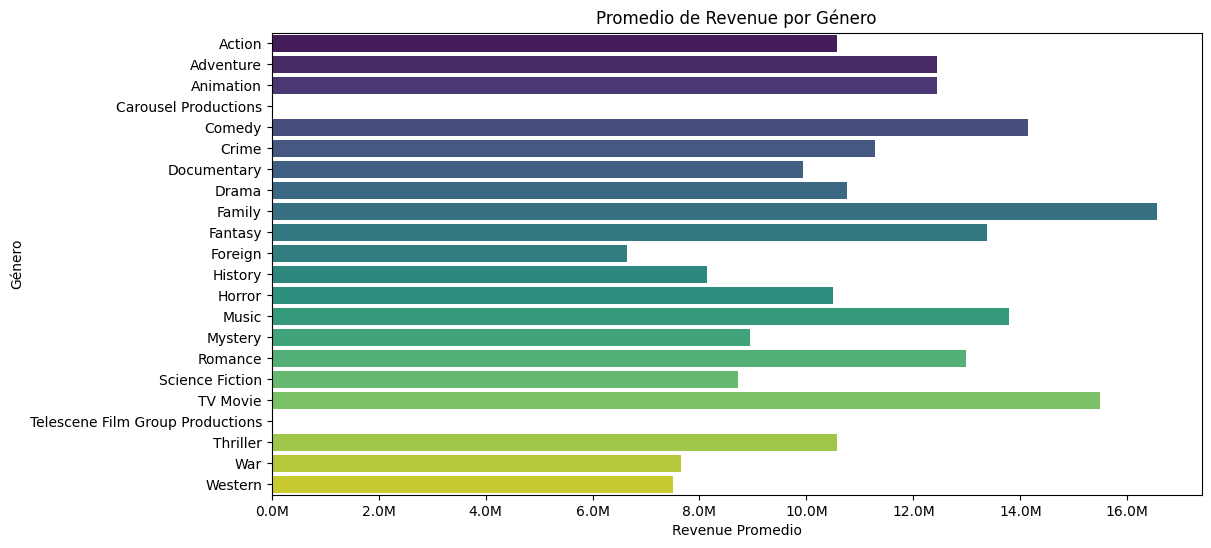

C:\Users\Angelica\AppData\Local\Temp\ipykernel_26764\750406775.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity_avg', y='name_genres', data=genre_avg, palette='magma')


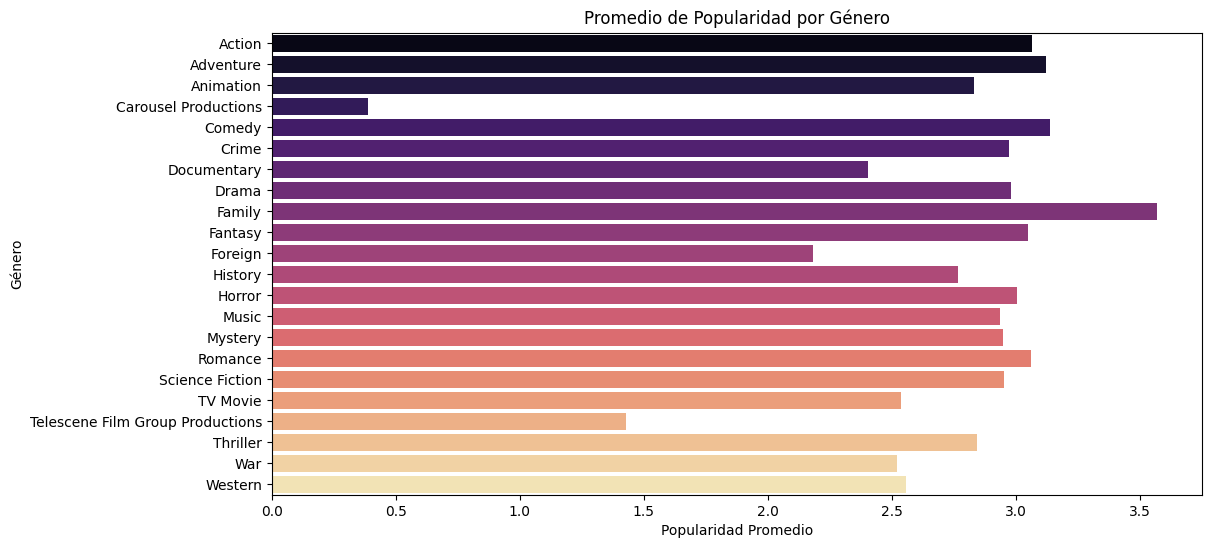

In [73]:
# Grafica Revenue promedio por género
plt.figure(figsize=(12, 6))
sns.barplot(x='revenue_avg_', y='name_genres', data=genre_avg, palette='viridis')
plt.title('Promedio de Revenue por Género')
plt.xlabel('Revenue Promedio')
plt.ylabel('Género')

# Aplicamos el formato de millones a los ejes X y Y
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_millions))
plt.show()

# Grafica Popularity promedio por género
plt.figure(figsize=(12, 6))
sns.barplot(x='popularity_avg', y='name_genres', data=genre_avg, palette='magma')
plt.title('Promedio de Popularidad por Género')
plt.xlabel('Popularidad Promedio')
plt.ylabel('Género')
plt.show()


**Resultado analísis**: 